## Import Required Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
# Reading Dataset
df = pd.read_csv("../data/data.csv")

# displays the top 5 columns of the dataframe
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


## Understanding the Dataset

In [3]:
# no of rows and columns in the dataframe
df.shape

(1059, 8)

In [4]:
# column names of the dataframe
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [5]:
# data types of each column in the dataframe
df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [6]:
# basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
# counting null values in each column of the dataframe
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [8]:
# checking for any duplicated values
df.duplicated().sum()

976

In [9]:
# count values of categorical column 'Grade'
df.Grade.value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [10]:
# percentage of split between the categorical values
df.Grade.value_counts(normalize=True)

low       0.405099
medium    0.353163
high      0.241737
Name: Grade, dtype: float64

In [11]:
# gives a brief summary stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


## Data Visualization

In [12]:
from scipy import stats
from statsmodels.api import qqplot

In [13]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [14]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.boxplot(
        y=col_name, x="Grade", data=df, ax=axes[0][0]
    )  # displays boxplot of the given dataframe column
    sns.violinplot(
        y=col_name, x="Grade", data=df, ax=axes[0][1], split=True
    )  # displays violinplot of the given dataframe column
    sns.swarmplot(
        y=col_name, x="Grade", data=df, ax=axes[1][0]
    )  # displays swarmplot of the given dataframe columns
    sns.barplot(
        x=col_name, y="Grade", data=df, hue="Grade"
    )  # displays barplot of the given dataframe column respect to 'Grade' column
    plt.suptitle(
        "Statistics of " + col_name
    )  # sets the title for the subplot as "Statistics of <column name>"
    plt.show()  # shows the plot

In [15]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df, hue="Grade", aspect=4, palette="bright"
    )  # sets a seaborn FacetGrid with hue = "Grade" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "Grade"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to Grade"
    )  # sets the title for the plot as "<column name> respect to Grade"
    plt.show()  # shows the plot

### Grade

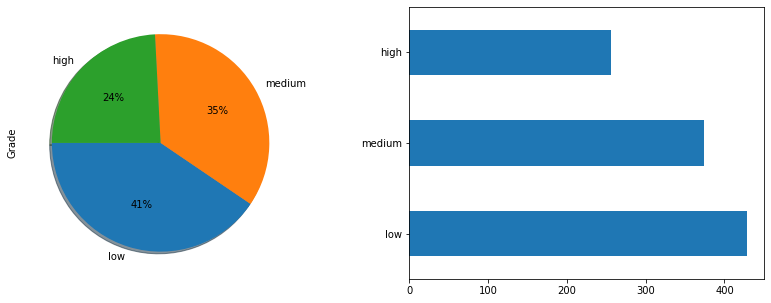

In [16]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 5)
)  # sets 1 x 2 subplots with figure size of (14,5)
df.Grade.value_counts().plot.pie(
    autopct="%.0f%%", shadow=True, startangle=180, ax=ax[0]
)  # plots pie chart of Grade column with % percentage
df.Grade.value_counts().plot.barh(
    ax=ax[1]
)  # plots bar chart of Grade column value counts
plt.show()  # shows the plot